In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\sklearn\datasets\_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [60]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [61]:
#데이터 확인
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [62]:
#데이터프레임으로 변환
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)

#변환된 데이터 확인
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [63]:
#데이터타입 확인
df.info()

type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


pandas.core.frame.DataFrame

In [64]:
#결측치 확인
df.isna().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

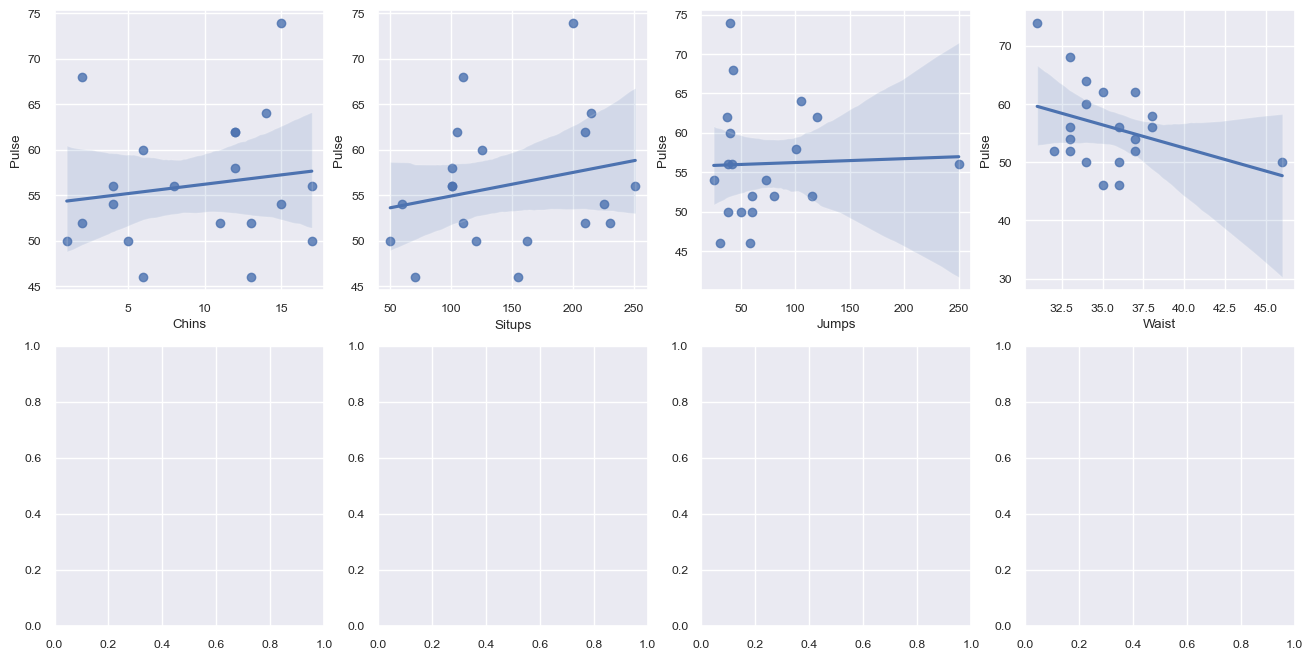

In [65]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps','Waist']

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

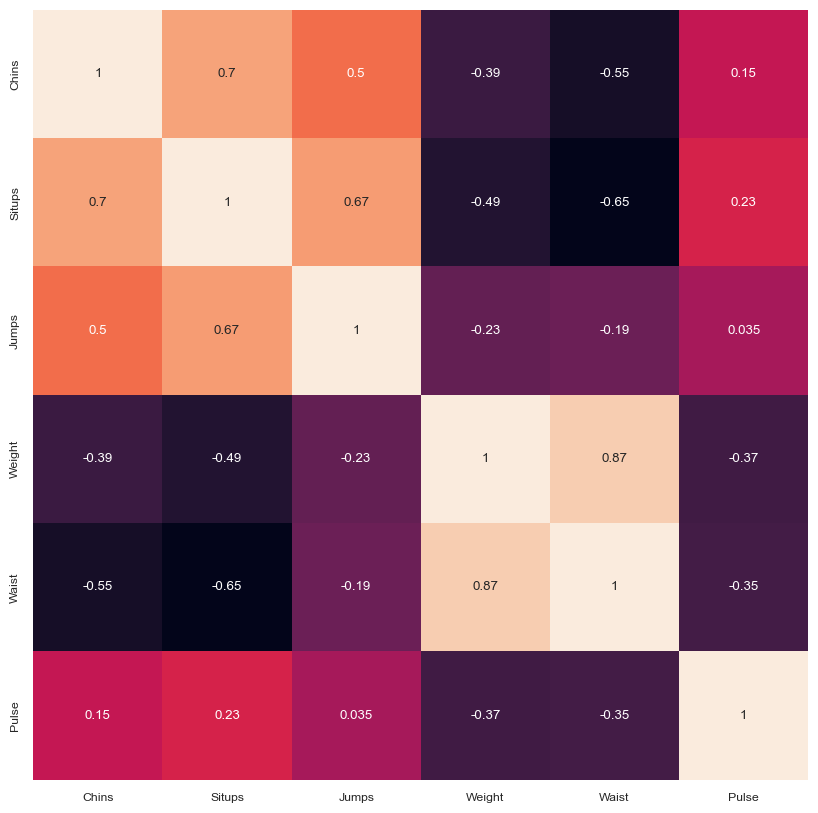

In [66]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [67]:
X = df.drop(['Pulse'], axis=1)
X

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0
5,4.0,101.0,42.0,182.0,36.0
6,8.0,101.0,38.0,211.0,38.0
7,6.0,125.0,40.0,167.0,34.0
8,15.0,200.0,40.0,176.0,31.0
9,17.0,251.0,250.0,154.0,33.0


In [68]:
# 입력과 라벨로 데이터 나누기
X = df.iloc[:,0:5].values
y = df.iloc[:,5].values

#train-test data split
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [69]:
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [70]:
y1

array([ 1,  2,  5,  7,  0,  4,  4,  6, 10,  4,  1,  2,  8,  1,  0,  7,  3,
        2,  3,  9], dtype=int64)

In [71]:
# 원-핫 인코딩을 0과 1로 변환
data_binary = (Y == True).astype(int)

data_binary

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# DNN

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 새로운 모델 객체 생성
model = Sequential()

# 층(layer) 정의
model.add(Dense(64, input_shape=(5,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

# 모델 컴파일
model.compile(Adam(lr=0.02), 'binary_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                384       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 11)                187       
                                                                 
Total params: 3179 (12.42 KB)
Trainable params: 3179 (12.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
1/1 [==============================] - 1s 843ms/step - loss: 6.1216 - accuracy: 0.1250 - val_loss: 5.0992 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 5.2776 - accuracy: 0.1250 - val_loss: 4.2835 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 4.5165 - accuracy: 0.1250 - val_loss: 3.5493 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 3.8391 - accuracy: 0.0625 - val_loss: 2.9065 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 3.2439 - accuracy: 0.1250 - val_loss: 2.3369 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 2.7293 - accuracy: 0.1250 - val_loss: 1.8809 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 2.3276 - accuracy: 0.1250 - val_loss: 1.7000 - val_accuracy: 0.

1/1 [==============================] - 0s 26ms/step - loss: 0.3635 - accuracy: 0.3750 - val_loss: 0.4493 - val_accuracy: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3586 - accuracy: 0.3750 - val_loss: 0.4517 - val_accuracy: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3537 - accuracy: 0.3750 - val_loss: 0.4551 - val_accuracy: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 24ms/step - loss: 0.3490 - accuracy: 0.3750 - val_loss: 0.4590 - val_accuracy: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3446 - accuracy: 0.3750 - val_loss: 0.4625 - val_accuracy: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 24ms/step - loss: 0.3408 - accuracy: 0.3750 - val_loss: 0.4646 - val_accuracy: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 24ms/step - loss: 0.3374 - accuracy: 0.4375 - val_loss: 0.4644 - val_accuracy: 0.0000e+0

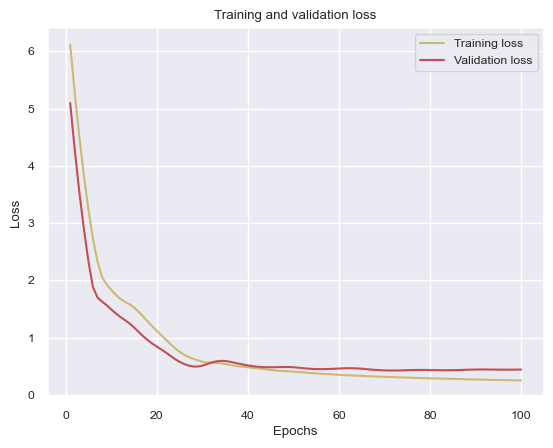

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 훈련 중에 계산된 손실(loss) 및 검증 손실(val_loss) 데이터 추출
loss = model_history.history['loss']         # 훈련 손실
val_loss = model_history.history['val_loss'] # 검증 손실

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss)을 시각화
plt.plot(epochs, loss, 'y', label='Training loss')     # 훈련 손실
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 검증 손실

# 그래프 제목, 축 레이블, 범례 추가
plt.title('Training and validation loss') # 그래프 제목
plt.xlabel('Epochs')                      # x 축 레이블
plt.ylabel('Loss')                        # y 축 레이블
plt.legend()                              # 범례 표시

# 그래프를 화면에 출력
plt.show()


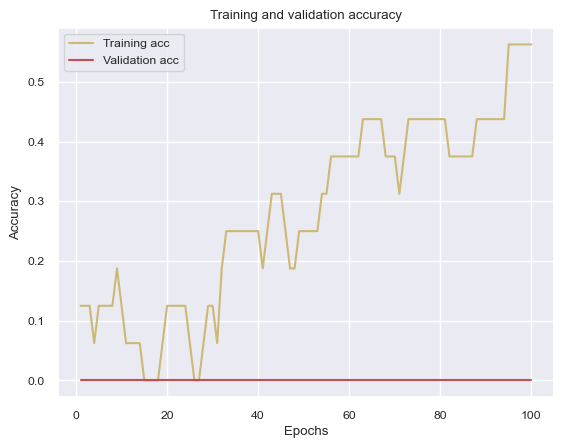

In [79]:
# 모델 훈련 중에 계산된 정확도(accuracy) 및 검증 정확도(val_accuracy) 데이터 추출
acc = model_history.history['accuracy']           # 훈련 정확도
val_acc = model_history.history['val_accuracy']   # 검증 정확도

# 에포크(epoch) 범위 생성
epochs = range(1, len(acc) + 1)

# 훈련 정확도(training accuracy)와 검증 정확도(validation accuracy)를 시각화
plt.plot(epochs, acc, 'y', label='Training acc')          # 훈련 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc')    # 검증 정확도

# 그래프 제목, 축 레이블, 범례 추가
plt.title('Training and validation accuracy')   # 그래프 제목
plt.xlabel('Epochs')                            # x 축 레이블
plt.ylabel('Accuracy')                          # y 축 레이블
plt.legend()                                    # 범례 표시

# 그래프를 화면에 출력
plt.show()
